## exam3-3 nla - continuation



**This is an exam. You must be present in the exam room to get credit for this problem unless you have prior permission from the instructor. You may not talk during the exam except to ask an instructor a question. By turning this in, you agree that this work is your own, and you did not get unauthorized help to complete it or provide unauthorized help to anyone else. You may not modify your exam answer after the due time without permission.**

A common problem in solving nonlinear problems is *how to make the initial guess*?

Let's consider finding the solution to the following nonlinear equations:

$2 + x + y - x^2 + 8 x y + y^3 = 0$

$1 + 2x - 3y + x^2 + xy - y e^x = 0$

The strategy we work on here is to reformulate these equations with a new variable $\lambda$

$2 + x + y + \lambda(- x^2 + 8 x y + y^3) = 0$

$1 + 2x - 3y + \lambda(x^2 + xy - y e^x) = 0$



#### Part 1 solve the linear problem



If $\lambda=1$ then we have the original nonlinear equations. If you set $\lambda=0$ though, you have a simple linear set of equations to solve. Find a solution to those equations for $\lambda=0$:



In [51]:
import autograd.numpy as np
from autograd import jacobian, hessian, grad, elementwise_grad
from scipy.integrate import solve_ivp, quad, simps
import matplotlib.pyplot as plt

In [2]:
A = np.array([[1,1],[2,-3]])
b = np.array([-2,-1])
x0, y0 = np.linalg.solve(A,b)

This solution represents the solution to the equations when $\lambda=0$. If we could derive a set of equations for $\frac{dx}{d\lambda}$ and $\frac{dy}{d\lambda}$, then we can treat this linear solution as an initial value, and integrate the ODEs from $\lambda=0$ to $\lambda=1$ to find the solution to the nonlinear equations. In what follows, we motivate how to derive those equations.



#### Part 2 formulate a system of ODEs to solve the nonlinear problem



Next, we consider the equations as

$f(x, y) = 2 + x + y + \lambda(- x^2 + 8 x y + y^3) = 0$

$g(x, y) = 1 + 2x - 3y + \lambda(x^2 + xy - y e^x) = 0$

from calculus, you can show that:

$\frac{\partial f}{\partial x}\frac{\partial x}{\partial \lambda}+\frac{\partial f}{\partial y}\frac{\partial y}{\partial \lambda}=-\frac{\partial f}{\partial \lambda}$

$\frac{\partial g}{\partial x}\frac{\partial x}{\partial \lambda}+\frac{\partial g}{\partial y}\frac{\partial y}{\partial \lambda}=-\frac{\partial g}{\partial \lambda}$

You can rewrite this in a linear algebra form as:

\begin{equation}
\left[\begin{array}{cc}
\frac{\partial f}{\partial x} \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} \frac{\partial g}{\partial y}
\end{array}\right]
\left[\begin{array}{c}
\frac{\partial x}{\partial \lambda}\\
\frac{\partial y}{\partial \lambda}
\end{array}\right]
=
\left[\begin{array}{c}
-\frac{\partial f}{\partial \lambda}\\
-\frac{\partial g}{\partial \lambda}
\end{array}\right]
\end{equation}

The matrix on the left is the Jacobian of $F = [f(x,y), g(x, y)]$. This means you can solve for:

$$\left[\begin{array}{c}
\frac{\partial x}{\partial \lambda}\\
\frac{\partial y}{\partial \lambda}
\end{array}\right]
=
\mathbf{J}^{-1}
\left[\begin{array}{c}
-\frac{\partial f}{\partial \lambda}\\
-\frac{\partial g}{\partial \lambda}
\end{array}\right]$$

This last equation defines a set of differential equations that can be integrated from $\lambda=0$ where we know what (x, y) are, to $\lambda=1$ which leads to a solution to the original set of nonlinear equations!

Use the last equation to define a function for a system of ODEs, and then integrate the system of ODES from $\lambda=0$ to $\lambda=1$ to find the solution to the nonlinear set of equations. The solution is the value of $x, y$ at $\lambda=1$.



[ 3. -3.]
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.05551717, 0.11056878, 0.12449192, 0.12750154,
       0.13051115, 0.13266085, 0.13481056, 0.14344547, 0.16794082,
       0.22480767, 0.37255244, 0.67873396, 1.        ])
 t_events: None
        y: array([[-1.40000000e+00, -1.64566887e+00, -2.25520007e+00,
        -2.78976222e+00, -3.07473333e+00, -3.69211907e+00,
        -4.12179261e+00, -4.33121178e+00, -4.58879340e+00,
        -4.43244367e+00, -3.66389223e+00, -2.40849542e+00,
        -1.40269481e+00, -9.94678285e-01],
       [-6.00000000e-01, -6.90179319e-01, -9.04111215e-01,
        -1.07629109e+00, -1.16080936e+00, -1.32151457e+00,
        -1.40599541e+00, -1.43166683e+00, -1.40880158e+00,
        -1.21777075e+00, -8.63332882e-01, -4.20271562e-01,
        -1.11701283e-01,  2.28819482e-03]])
 y_events: None


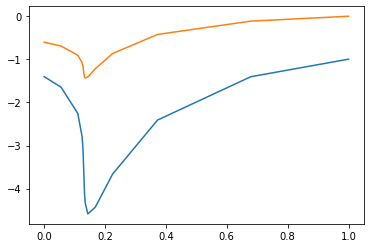

In [11]:
def F1(var):
    x, y = var
    f1 = 2 + x + y + -1*x**2 + 8*x*y + y**3
    g1 = 1 + 2*x - 3*y + x**2 + x*y - y*np.exp(x)
    return np.array([f1, g1]) 

def F2(lam, var):
    x, y = var
    f2 = 2 + x + y + lam*(-1*x**2 + 8*x*y + y**3)
    g2 = 1 + 2*x - 3*y + lam*(x**2 + x*y - y*np.exp(x))
    return np.array([f2, g2])

def odesys(lam, var):
    J = jacobian(F2, argnum = 1)
    Jval = J(lam, var) 
    RHS = jacobian(F2, argnum = 0)
    RHSval = -1*RHS(lam, var)
    return np.linalg.inv(Jval) @ RHSval

print(df1(np.array([0.,0.])))

lspan = (0,1)
var0  = np.array([x0, y0])
sol   = solve_ivp(odesys, lspan, var0)
print(sol)
plt.plot(sol.t, sol.y.T)

#### Part 3 Verify the solution you found



Use a method of your choice to verify your solution from Part 2.



In [4]:
import scipy.optimize as opt

In [5]:
opt.root(F1, np.array([1, 1]))

    fjac: array([[-0.99999892, -0.00147201],
       [ 0.00147201, -0.99999892]])
     fun: array([ 6.01546328e-13, -4.01854965e-13])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-7.69807424e-09,  5.15372442e-09])
       r: array([-2.99331549,  6.9757453 ,  4.37785119])
  status: 1
 success: True
       x: array([-1.00000000e+00,  9.20062966e-14])

## exam3-1 uncertainty



**This is an exam. You must be present in the exam room to get credit for this problem unless you have prior permission from the instructor. You may not talk during the exam except to ask an instructor a question. By turning this in, you agree that this work is your own, and you did not get unauthorized help to complete it or provide unauthorized help to anyone else. You may not modify your exam answer after the due time without permission.**

The time required to reach a particular conversion $X$ in a reactor is given by this integral equation:

$t = \int_0^X \frac{1}{k C_{A0} (1 - X)^2} dX$

In this problem, $k = 1e-3$ L/mol/min, and $C_{A0} = 1$ mol/L.

We aim to find the uncertainty in the amount of time required to reach a conversion of 0.9. The uncertainty is estimated by:

$\sigma_t = \sqrt{\frac{\partial t}{\partial k}^2 \sigma_k^2 + \frac{\partial t}{\partial C_{A0}}^2 \sigma_{C_{A0}}^2 }$

with $\sigma_k = 1e-4$ and $\sigma_{C_{A0}} = 0.01$.

To evaluate those derivatives, we need a differentiable integrator. You can use this implementation of the trapezoid rule for that. You cannot use the quad function.



In [52]:
#import autograd.numpy as np

#def trapz(y, x):
#    d = np.diff(x)
#    return np.sum((y[0:-1] + y[1:]) * d / 2)

First, use the equation above and the provided trapz function to find the time required to reach 90% conversion for this reactor.



In [82]:
from scipy.integrate import trapz
def integrand(X, k, CA0):
    return 1/k/CA0/(1-X)**2

k   = 1.0e-3 #L/mol/min
CA0 = 1.0  #mol/L
X0 = 0.0
Xf = 0.9
time, err = quad(integrand, X0, Xf, args = (k, CA0))

time2 = trapz(Ilist,Xlist)
print(time2)

def time(k, CA0):
    Xlist = np.linspace(0,0.9,1000)
    Ilist = integrand(Xlist, k, CA0)
    t = trapz(Ilist, Xlist)
    return t
dtdk = grad(time, argnum = 0)
dtdC = grad(time, argnum = 1)
sigmak = 1e-4
sigmaC = 0.01
sigmat = np.sqrt(dtdk(k, CA0)**2 * sigmak**2 + dtdC(k, CA0)**2 * sigmaC**2)
print(sigmat)

9000.135132939517
904.5023865932247


Next, use the formula for $\sigma_t$ to estimate the uncertainty in this time.



In [83]:
sigmat = np.sqrt(dtdk(k, CA0)**2 * sigmak**2 + dtdC(k, CA0)**2 * sigmaC**2)
print(sigmat)

904.5023865932247


## Quiz 6 - uncertainty propagation in implicit functions



The equation $y = e^{a y}$ is implicit in $y$. Suppose we know that $a = 0.2 \pm 0.02$ ($\sigma_a = 0.02$). First, solve for the value of $y$  with a method of your choice.



In [100]:
import scipy.optimize as opt
def func(y, a):
    return y - np.exp(a*y)
yguess = 1
a      = 0.2
#sol    = opt.newton(func, yguess, args = (a,), full_output = True)
#print(sol)
sol2   = opt.root_scalar(func, args = (a,), fprime = grad(func, argnum = 0), x0 = yguess)
print(sol2)
ysol = sol2.root

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: 1.295855509095369


Now the question is what is the uncertainty in $y$ since we know there is some uncertainty in $a$? A good approximation for the uncertainty in $y$ is $\sigma_y \approx \frac{dy}{da} * \sigma_a$.  Use this information to estimate the uncertainty ($\sigma_y$) in the solution you obtained.



In [103]:
dyda = grad(func, argnum = 1)
sigmaa = 0.02
sigmay = dyda(ysol, a)*sigmaa
print(sigmay)

-0.033584830009056356


Describe an engineering application where this could be useful.



## van Laar equation



Review the expression for $\frac{G_{ex}}{RT}$ in the Van Laar equation at
[https://en.wikipedia.org/wiki/Van_Laar_equation](https://en.wikipedia.org/wiki/Van_Laar_equation).

There are also equations for the two activity coefficients that are derived from that expression. According to the Gibbs-Duhem equation:

$0 = x_1 \frac{d \ln \gamma_1}{d n_1} + x_2 \frac{d \ln \gamma_2}{d n_1}$

Assuming we have a mixture of Acetone and water, use autograd to demonstrate that the Gibbs-Duhem equation is satisfied over the range of composition for $0 \le x_1 \le 1$.

You may find it helpful to note that $x_1 = \frac{n_1}{n_1 + n_2}$.



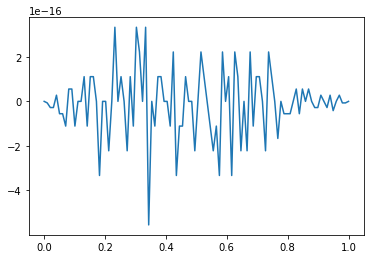

In [115]:
def loggamma1(X1, A):
    A12, A21 = A
    X2 = 1 - X1
    return A12*(A21*X2/(A12*X1 + A21*X2))**2

def loggamma2(X1, A):
    A12, A21 = A
    X2 = 1 - X1
    return A21*(A12*X1/(A12*X1 + A21*X2))**2

def obj(X1, A):
    X2 = 1 - X1
    dlg1dx1 = grad(loggamma1, argnum = 0)
    dlg2dx1 = grad(loggamma2, argnum = 0)
    return X1*dlg1dx1(X1, A) + X2*dlg2dx1(X1, A)

A = np.array([2.1041, 1.5555])
X1 = np.linspace(0,1,100)
GD = [obj(val, A) for val in X1]
plt.plot(X1,GD)


## Using the Hessian in optimization



**This is a quiz. You must be present in class to get credit for it. All your work must be your own, and turning this in means you agree that you worked alone on this assignment.**

Newton's method is an iterative method based on finding roots using information about the derivative. There is an improvement if we use the Hessian shown below:

$x_{n+1} = x_n - \mathbf{H(x_n)}^{-1} \mathbf{\nabla f(x_n)}$

where $\mathbf{H(x_n)}$ is the Hessian matrix, and $\nabla f(x_n)$ is the gradient of $f$ evaluated at $x_n$, which may be a vector. $f$ is a scalar function. This algorithm is still iterative, and starts from an initial guess.

Use this information with autograd to find a minimum of the rosenbrock function starting at the point (5.0, 5.0). Verify you have found a minimum.



In [128]:
from autograd import hessian
def rosenbrock(X):
    x, y = X
    return (1 - x)**2 + 100 * (y - x**2)**2

hess = hessian(rosenbrock)
delf = grad(rosenbrock)

tolerance = 1e-10
threshold = 10
X = np.array([5.0, 5.0])

while threshold >= tolerance:
    X = X - np.linalg.inv(hess(X)) @ delf(X)
    print(X)
    threshold = rosenbrock(X)
    

[ 4.99900025 24.9900025 ]
[  1.00079924 -14.98401219]
[1.00079899 1.00159862]
[1.         0.99999936]
